<center><h1>Capstone Project Creation</h1></center>
<center><h3>IBM SkillsBuild Europe Delivery - Data Analytics</h3></center>
<center><h3>Student: Cepeda Mariana</h3></center>


# Pre-requisite

* Understanding of Python, Power BI or Tableau
* Understanding of Data Cleaning
* Understanding Data Visualization

#### Level of Exercise: Intermediate

#### Duration: approximately 3 hours


### Data Analytics of Airbnb Data:

#### Objective:

In this exericise, you will be performing Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of Airbnb Data:

People's main criteria when visiting new places are reasonable accommodation and food. Airbnb (Air-Bed-Breakfast) is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset Source

You can get the dataset for this assessment using the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

This dataset contains information such as the neighborhood offering these services, room type, price, avaliabilty, reviews, service fee, cancellation policy and rules to use the house. This analysis will help airbnb in improving its services.  

So all the best for your Data Analytics Journey on Airbnb data!!!

## Task 1: Data Loading (Python)

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [119]:
#!pip install pandas

# Importing the libraries
import pandas as pd
import numpy as np

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns

In [120]:
## Read the csv file
df = pd.read_csv('Airbnb_Open_Data.csv', low_memory=False)

In [121]:
## Display the first 5 rows
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [122]:
## Display the data types
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Task 2a: Data Cleaning (Any Tool)

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset.
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [123]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [124]:
df.drop(columns=['host id', 'id', 'country', 'country code'], axis=1, inplace=True)

In [125]:
df.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'house_rules',
       'license'],
      dtype='object')

Reason for excluding these columns:
The columns 'host id', 'id', 'country', and 'country code' were omitted to streamline the dataset and minimize unnecessary clutter. They didn't contribute significantly to the analysis, hence their removal allows a more targeted focus on the most pertinent aspects for the ongoing analysis

## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

In [126]:
## Check for missing values in the dataframe and display the count in ascending order.
df.isnull().sum().sort_values(ascending=True)

room type                              0
lat                                    8
long                                   8
neighbourhood                         16
neighbourhood group                   29
cancellation_policy                   76
instant_bookable                     105
number of reviews                    183
Construction year                    214
price                                247
NAME                                 250
service fee                          273
host_identity_verified               289
calculated host listings count       319
review rate number                   326
host name                            406
minimum nights                       409
availability 365                     448
reviews per month                  15879
last review                        15893
house_rules                        52131
license                           102597
dtype: int64

In [127]:
## If the values are missing, impute the values as per the datatype of the columns
for columns in df.columns:
    if df[str(columns)].dtype == "object":
        print(columns)
        df[str(columns)].fillna(value=df[str(columns)].mode()[0], inplace=True)
    else:
        df[str(columns)].fillna(value=df[str(columns)].median(), inplace=True)

NAME
host_identity_verified
host name
neighbourhood group
neighbourhood
instant_bookable
cancellation_policy
room type
price
service fee
last review
house_rules
license


In [128]:
## Check for missing values again
df.isnull().sum().sort_values(ascending=True)

NAME                              0
availability 365                  0
calculated host listings count    0
review rate number                0
reviews per month                 0
last review                       0
number of reviews                 0
minimum nights                    0
service fee                       0
price                             0
Construction year                 0
room type                         0
cancellation_policy               0
instant_bookable                  0
long                              0
lat                               0
neighbourhood                     0
neighbourhood group               0
host name                         0
host_identity_verified            0
house_rules                       0
license                           0
dtype: int64

In [129]:
## Check whether there are any duplicate values in the dataframe and if present remove them.
df.shape

(102599, 22)

In [130]:
df.drop_duplicates(inplace=True)

In [131]:
## Display the total number of records in the dataframe after removing the duplicates.
df.shape

(99138, 22)

## Task 3: Data Transformation (Any Tool)


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [132]:
## Rename the column.
df.rename(columns={'availability 365': 'days_booked'}, inplace=True)

In [133]:
df.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'days_booked', 'house_rules',
       'license'],
      dtype='object')

In [134]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [135]:
df.columns

Index(['name', 'host_identity_verified', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'days_booked', 'house_rules',
       'license'],
      dtype='object')

In [136]:
## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.
df['price'] = df['price'].astype(str)
df['service_fee'] = df['service_fee'].astype(str)

In [137]:
## Clean values by removing white spaces, dollar signs, and commas.
df['price'] = df['price'].str.replace('[$, ]', '', regex=True).astype(int)
df['service_fee'] = df['service_fee'].str.replace('[$, ]', '', regex=True).astype(int)

In [138]:
df[['price', 'service_fee']].head()

,price,service_fee
0,966,193
1,142,28
2,620,124
3,368,74
4,204,41


## Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [139]:
## List the count of various room types avaliable with Airbnb
df['room_type'].value_counts()

room_type
Entire home/apt    51987
Private room       44887
Shared room         2149
Hotel room           115
Name: count, dtype: int64

In [140]:
## Which room type adheres to more strict cancellation policy
df['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible'], dtype=object)

In [141]:
## Room types sorted by the more strict cancellation policy
df[df['cancellation_policy'] == 'strict']['room_type'].value_counts()

room_type
Entire home/apt    17238
Private room       14936
Shared room          718
Hotel room            34
Name: count, dtype: int64

In [142]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals

# Prices per neighborhood group
prices_per_ngroup = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
print(prices_per_ngroup)

neighbourhood_group
Queens           628.668822
Brooklyn         625.471627
Bronx            625.271511
Staten Island    625.060870
Manhattan        621.666140
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


In [143]:
# Most expensive neighborhood group to rent
most_expensive_ngroup = prices_per_ngroup.idxmax()
print("\nThe most expensive neighborhood to rent from:", most_expensive_ngroup)


The most expensive neighborhood to rent from: Queens


## Task 5a: Data Visualization (Any Tool)

* List the count of various room types avaliable with Airnb
* Which room type adheres to more strict cancellation policy
* List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
* List the top 10 neighborhoods in the increasing order of their price with the help of a horizontal bar graph. Which is the cheapest neighborhood.
* List the neighborhoods which offer short term rentals within 10 days. Illustrate with a bar graph
* List the prices with respect to room type using a bar graph and also state your inferences.
* Create a pie chart that shows  distribution of booked days for each neighborhood group .Which neighborhood has the highest booking percentage.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [144]:
# List the count of various room types avaliable with Airbnb
df['room_type'].value_counts()

room_type
Entire home/apt    51987
Private room       44887
Shared room         2149
Hotel room           115
Name: count, dtype: int64

In [145]:
room_type_counts = df['room_type'].value_counts()


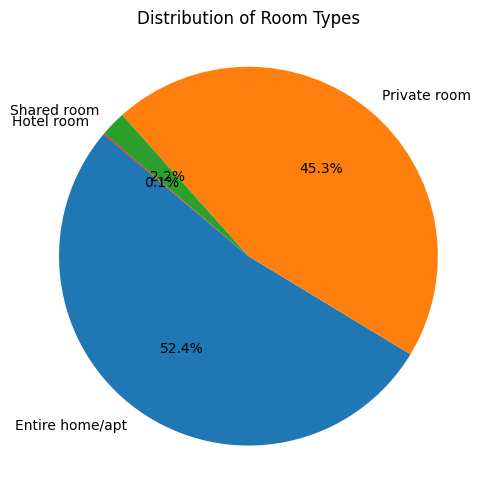

In [146]:
## Plotting count of various room types as a pie chart
plt.figure(figsize=(5, 5))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Room Types')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [147]:
# Which room type adheres to more strict cancellation policy
df[df['cancellation_policy'] == 'strict']['room_type'].value_counts()

room_type
Entire home/apt    17238
Private room       14936
Shared room          718
Hotel room            34
Name: count, dtype: int64

In [148]:
strict_cancellation_policy_counts = df[df['cancellation_policy'] == 'strict']['room_type'].value_counts()

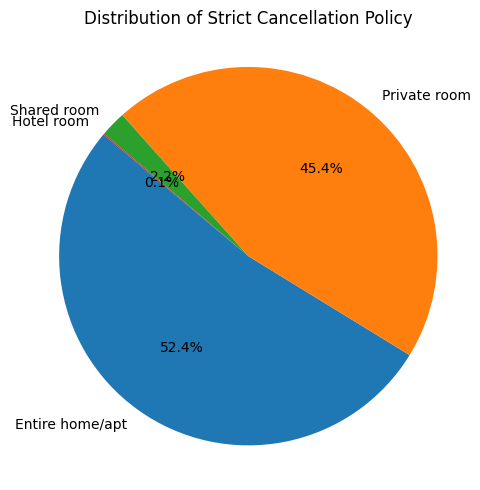

In [149]:
## Plotting count of cancellation policy as a pie chart
plt.figure(figsize=(5, 5))
plt.pie(strict_cancellation_policy_counts, labels=strict_cancellation_policy_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Strict Cancellation Policy')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [150]:
# List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
prices_per_ngroup = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
print(prices_per_ngroup)

neighbourhood_group
Queens           628.668822
Brooklyn         625.471627
Bronx            625.271511
Staten Island    625.060870
Manhattan        621.666140
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


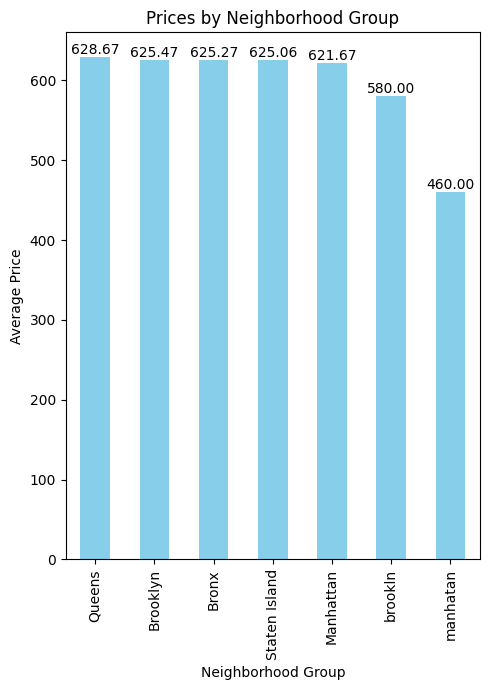

In [151]:
## Visualize prices by neighborhood group
plt.figure(figsize=(5, 7))
prices_per_ngroup.plot(kind='bar', color='skyblue')
plt.title('Prices by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.tight_layout()

for i, val in enumerate(prices_per_ngroup):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom')

plt.show()

In [152]:
## Most expensive neighborhood group to rent
most_expensive_ngroup = prices_per_ngroup.idxmax()
print("\nThe most expensive neighborhood to rent from:", most_expensive_ngroup)


The most expensive neighborhood to rent from: Queens


In [153]:
# List the top 10 neighborhoods in the increasing order of their price with the help of a horizontal bar graph. Which is the cheapest neighborhood.
df["neighbourhood"].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [154]:
neighborhood_prices = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).tail(10)
print(neighborhood_prices)

neighbourhood
Oakwood                       469.307692
West Farms                    463.166667
Emerson Hill                  443.800000
Castleton Corners             417.230769
Richmondtown                  373.400000
Rossville                     327.500000
Breezy Point                  309.888889
Spuyten Duyvil                307.000000
Bay Terrace, Staten Island    306.000000
Lighthouse Hill               107.666667
Name: price, dtype: float64


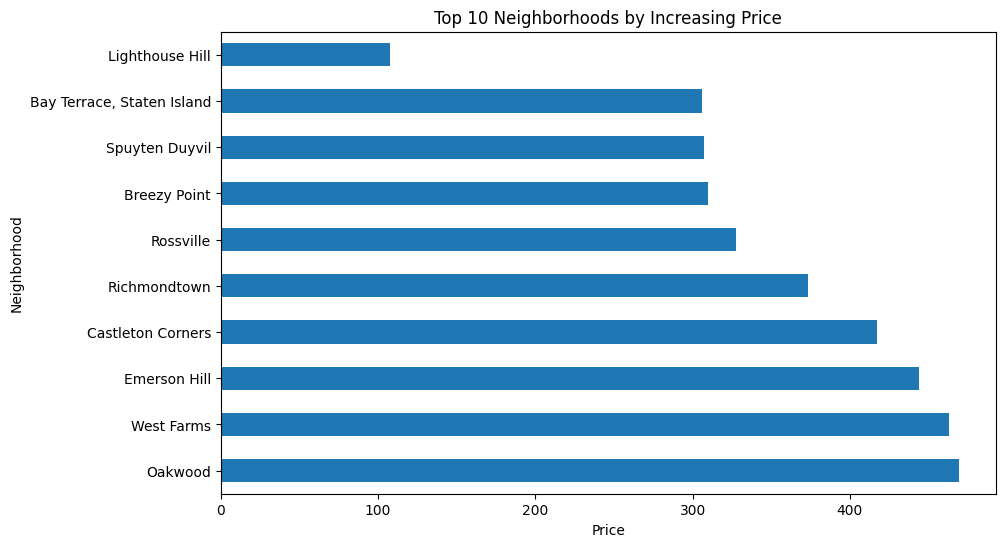

In [155]:
## Plotting the top 10 neighborhoods by increasing price
plt.figure(figsize=(10, 6))
neighborhood_prices.plot(kind='barh')
plt.title('Top 10 Neighborhoods by Increasing Price')
plt.xlabel('Price')
plt.ylabel('Neighborhood')
plt.show()

In [156]:
## The cheapest neighborhood
cheapest_neighborhood = neighborhood_prices.idxmin()
print("The cheapest neighborhood is:", cheapest_neighborhood)

The cheapest neighborhood is: Lighthouse Hill


In [157]:
# List the neighborhoods which offer short term rentals within 10 days. Illustrate with a bar graph
short_term_rentals = df[df['minimum_nights'] <= 10]

In [158]:
neighborhood_counts = short_term_rentals['neighbourhood'].value_counts().head(15)

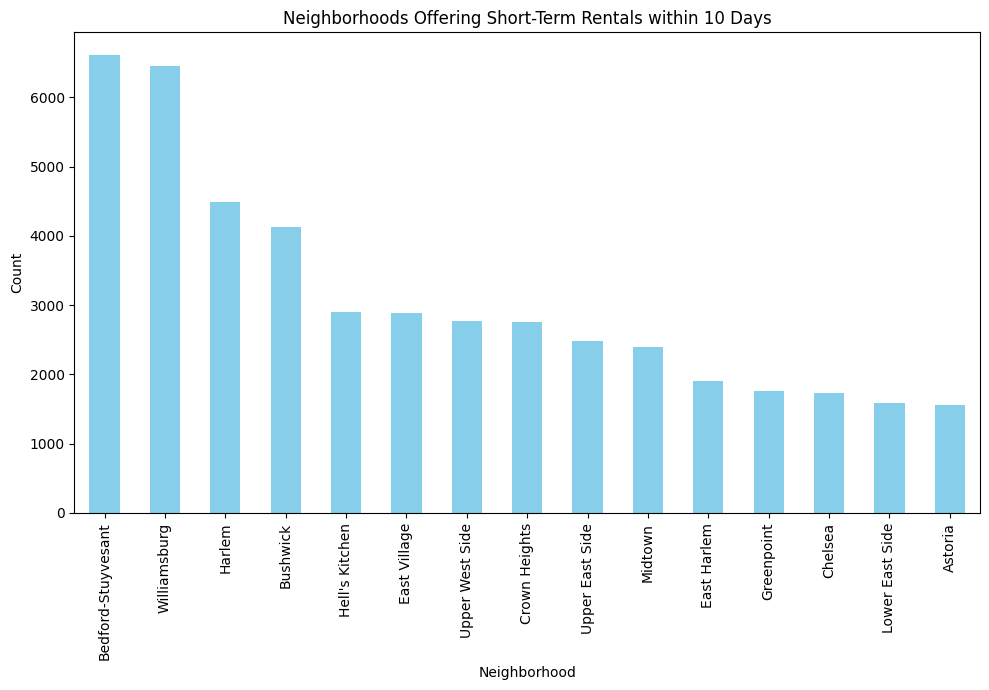

In [159]:
## Plotting the neighborhoods offering short-term rentals within 10 days
plt.figure(figsize=(10, 7))
neighborhood_counts.plot(kind='bar', color='skyblue')
plt.title('Neighborhoods Offering Short-Term Rentals within 10 Days')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [160]:
# List the prices with respect to room type using a bar graph and also state your inferences.
# Grouping data by room type and calculating average price
average_prices = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

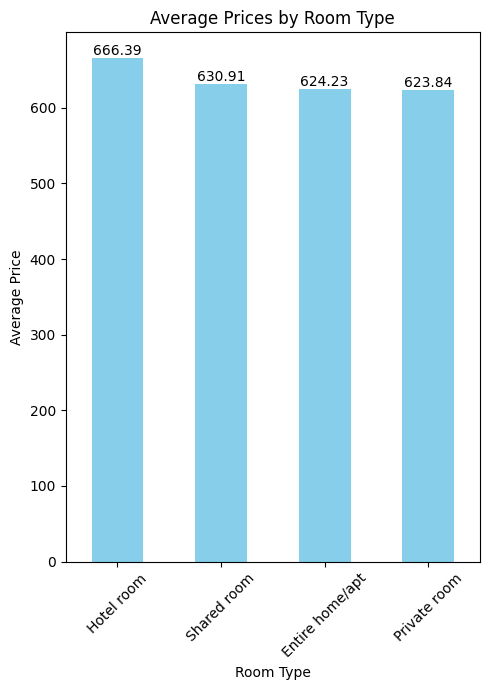

In [161]:
## Creating a bar plot
plt.figure(figsize=(5, 7))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()

for i, val in enumerate(average_prices):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom')
plt.show()

Inferences:

Hotel rooms tend to have the highest average prices compared to other room types.
Shared rooms follow, ranking next in terms of average pricing, followed by Entire home/apartment and private rooms, which generally exhibit lower average prices.

In [162]:
# Create a pie chart that shows distribution of booked days for each neighborhood group. Which neighborhood has the highest booking percentage.
total_days = df.groupby('neighbourhood_group')['days_booked'].sum()

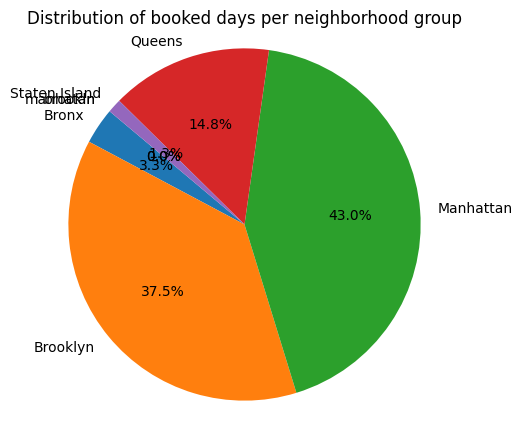

In [163]:
## Plotting a pie chart
plt.figure(figsize=(5, 5))
plt.pie(total_days, labels=total_days.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # To ensure the chart is circular
plt.title('Distribution of booked days per neighborhood group')
plt.show()

In [164]:
## Which neighborhood has the highest booking percentage.
highest_booking_neighborhood = total_days.idxmax()
print(f"The neighborhood with the highest booking percentage is: {highest_booking_neighborhood}")

The neighborhood with the highest booking percentage is: Manhattan


## Task 5b: Data Visualization (Any Tool)

* Does service price and room price have an impact on each other. Illustrate this relationship with a scatter plot and state your inferences
* Using a line graph show in which year the maximum construction of rooms took place.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

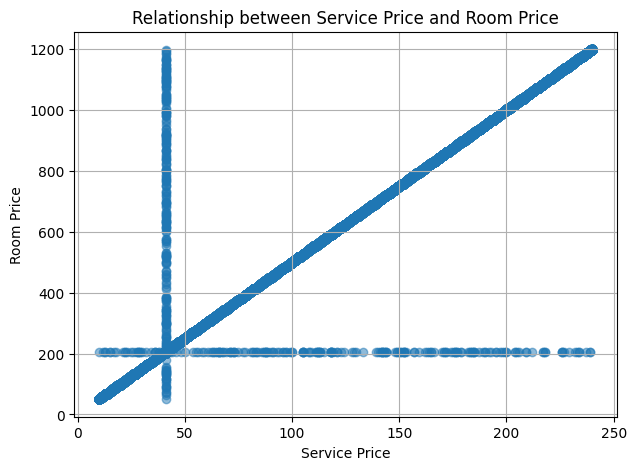

In [165]:
# Does service price and room price have an impact on each other. Illustrate this relationship with a scatter plot and state your inferences
plt.figure(figsize=(7, 5))
plt.scatter(df['service_fee'], df['price'], alpha=0.5)
plt.title('Relationship between Service Price and Room Price')
plt.xlabel('Service Price')
plt.ylabel('Room Price')
plt.grid(True)
plt.show()

In [166]:
## Correlation calculation between the two variables
correlation = df['service_fee'].corr(df['price'])
print(f"Correlation between service price and room price: {correlation}")
# Positive correlation indicates that as one variable increases, the other tends to as well

Correlation between service price and room price: 0.9939390863925024


In [170]:
#  Using a line graph show in which year the maximum construction of rooms took place.
# Counting the number of rooms constructed each year
rooms_constructed = df['construction_year'].value_counts().sort_index()

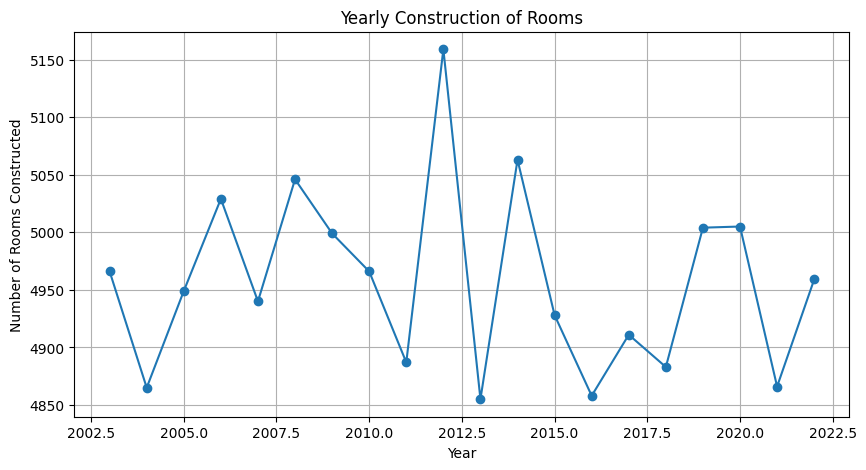

In [171]:
# Line plot to show the yearly construction of rooms
plt.figure(figsize=(10, 5))
rooms_constructed.plot(kind='line', marker='o')
plt.title('Yearly Construction of Rooms')
plt.xlabel('Year')
plt.ylabel('Number of Rooms Constructed')
plt.grid(True)
plt.show()

In [169]:
# Finding the year with the maximum construction of rooms
max_construction_year = rooms_constructed.idxmax()
max_construction_count = rooms_constructed.max()
print(f"Year with maximum construction of rooms: {max_construction_year} (Count: {max_construction_count})")

Year with maximum construction of rooms: 2012.0 (Count: 5159)


## Task 5c: Data Visualization (Any Tool)

* With the help of box plots illustrate the following
 * Effect of Review Rate number on price
 * Effect of host identity verified on price

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

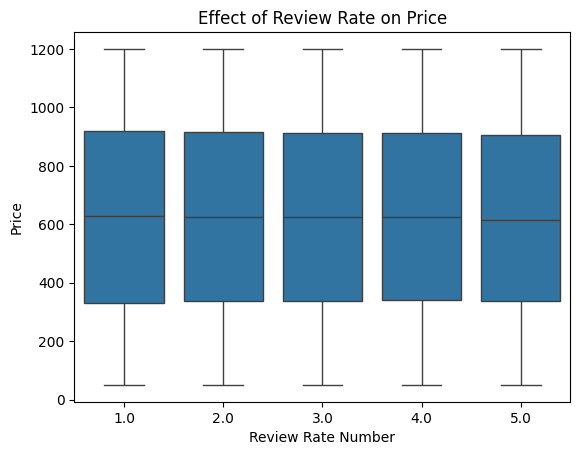

In [176]:
# Effect of Review Rate number on price
sns.boxplot(x='review_rate_number', y='price', data=df)
plt.title('Effect of Review Rate on Price')
plt.xlabel('Review Rate Number')
plt.ylabel('Price')
plt.show()

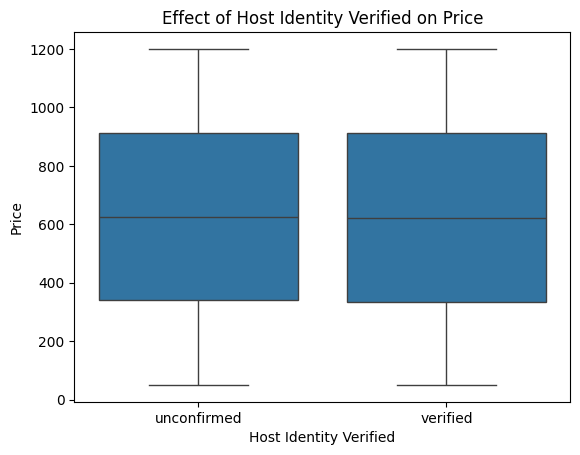

In [177]:
# Effect of host identity verified on price
sns.boxplot(x='host_identity_verified', y='price', data=df)
plt.title('Effect of Host Identity Verified on Price')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.show()

#### Thank you for this training!
####  Mariana C.